In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

- Here we will create and save charts.
- These visualizations of the data will be used in the final report.

In [2]:
df = pd.read_csv('fortune_2000_in_2021_cleaned_transformed.csv')

In [3]:
df

,Rank,Name,Country,Sales,Profit,Assets,Market Value,Sales (in millions),Profit (in millions),Assets (in millions),Market Value (in millions)
0,1,ICBC,China,$190.5 B,$45.8 B,"$4,914.7 B",$249.5 B,190500.0,45800.0,4914700.0,249500.0
1,2,JPMorgan Chase,United States,$136.2 B,$40.4 B,"$3,689.3 B",$464.8 B,136200.0,40400.0,3689300.0,464800.0
2,3,Berkshire Hathaway,United States,$245.5 B,$42.5 B,$873.7 B,$624.4 B,245500.0,42500.0,873700.0,624400.0
3,4,China Construction Bank,China,$173.5 B,$39.3 B,"$4,301.7 B",$210.4 B,173500.0,39300.0,4301700.0,210400.0
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$229.7 B,$49.3 B,$510.3 B,"$1,897.2 B",229700.0,49300.0,510300.0,1897200.0
...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,JTEKT,Japan,$13.1 B,$-34.9 M,$12 B,$3.5 B,13100.0,-34.9,12000.0,3500.0
1996,1997,Insurance Australia Group,Australia,$5.4 B,$-212 M,$25 B,$9.3 B,5400.0,-212.0,25000.0,9300.0
1997,1997,Sumec Corporation,China,$13 B,$79.2 M,$7.1 B,$1.3 B,13000.0,79.2,7100.0,1300.0
1998,1999,Gold Fields,South Africa,$3.9 B,$718.1 M,$7.5 B,$8.9 B,3900.0,718.1,7500.0,8900.0


# Which countries have the highest number of companies in the list?

In [4]:
# Dataframe of top 10 countries based on number of companies in the list
df_countries_highest = pd.DataFrame(df['Country'].value_counts().head(20))
# Add an index and value for others:
df_countries_highest.loc['Others'] = len(df) - int(df_countries_highest['Country'].sum())
df_countries_highest

,Country
United States,590
China,291
Japan,215
United Kingdom,66
South Korea,62
Hong Kong,59
Canada,56
Germany,54
France,53
India,50


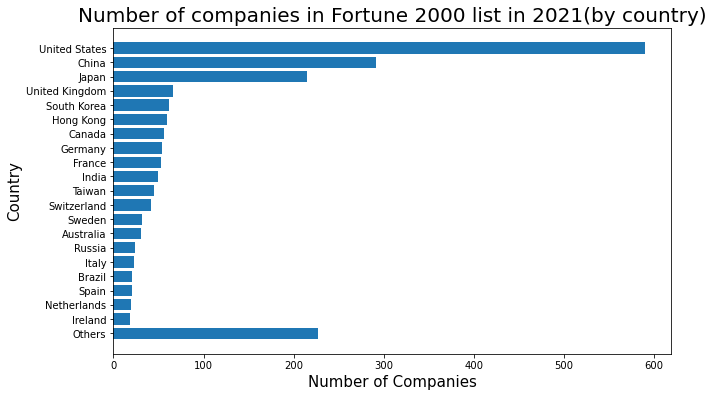

In [5]:
plt.figure(figsize=(10,6))
plt.barh(df_countries_highest.index, df_countries_highest["Country"])

plt.title("Number of companies in Fortune 2000 list in 2021(by country)", size=20, loc="center")
plt.xlabel('Number of Companies', size=15)
plt.ylabel('Country', size=15)

plt.gca().invert_yaxis()
plt.show()

# What share of companies on the list do the big two (USA and China) have in comparison to the rest of the world?

In [6]:
# Dataframe of top 2 countries (USA and China and others) based on number of companies in the list
df_us_china_others = pd.DataFrame(df['Country'].value_counts().head(2))
# Add an index and value for others:
df_us_china_others.loc['Others'] = len(df) - int(df_us_china_others['Country'].sum())
df_us_china_others

,Country
United States,590
China,291
Others,1119


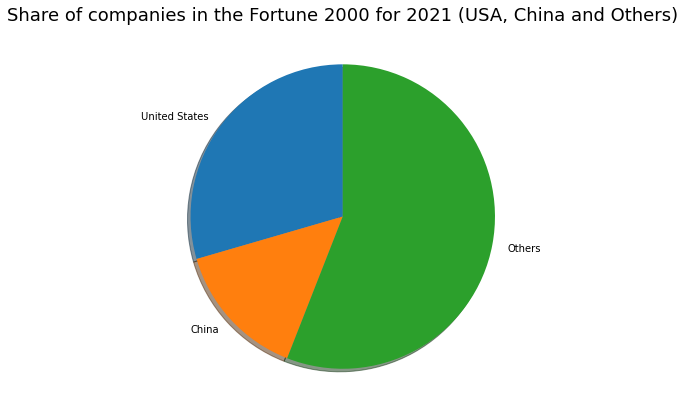

In [8]:
# Create a pie chart
plt.figure(figsize=(10,7))
plt.pie(df_us_china_others['Country'], labels=df_us_china_others.index, startangle=90, shadow=True)
plt.title("Share of companies in the Fortune 2000 for 2021 (USA, China and Others)", size=18)
plt.show()

# Which countries have the highest number of companies in the list that turned a profit in 2021?

In [9]:
# Create a True or False column called 'In Profit'
def greater_than_0(x):
    if x > 0:
        return True
    else:
        return False
df['In profit'] = df['Profit (in millions)'].apply(greater_than_0)
df.head(2)

,Rank,Name,Country,Sales,Profit,Assets,Market Value,Sales (in millions),Profit (in millions),Assets (in millions),Market Value (in millions),In profit
0,1,ICBC,China,$190.5 B,$45.8 B,"$4,914.7 B",$249.5 B,190500.0,45800.0,4914700.0,249500.0,True
1,2,JPMorgan Chase,United States,$136.2 B,$40.4 B,"$3,689.3 B",$464.8 B,136200.0,40400.0,3689300.0,464800.0,True


In [10]:
# Get 'Country' and 'In Profit' columns into an np.array
in_profit_countries = df[['Country','In profit']].values

In [11]:
# Iterate and append the true and false rows per country into a dictionary of dictionaries
in_profit_true_false = {}

for i in in_profit_countries:
    if not i[0] in in_profit_true_false.keys():
        in_profit_true_false[i[0]] = {"In Profit":0,"Not In Profit":0}
    
    if i[1] == True:
        in_profit_true_false[i[0]]['In Profit'] = in_profit_true_false[i[0]]['In Profit'] + 1
    else:
        in_profit_true_false[i[0]]['Not In Profit'] = in_profit_true_false[i[0]]['Not In Profit'] + 1

In [12]:
# Convert dictionary into a dataframe and transpose columns to give this result:
# COUNTRY IN PROFIT NOT IN PROFIT
# China    103      92
# USA       96      43
df_countries_in_profit = pd.DataFrame(in_profit_true_false)
df_countries_in_profit = df_countries_in_profit.T

In [86]:
# Order by most companies in profit
df_countries_in_profit.sort_values('In Profit', ascending=False, inplace=True)
df_countries_in_profit.head(10)

,In Profit,Not In Profit
United States,484,106
China,278,13
Japan,182,33
United Kingdom,54,12
Hong Kong,53,6
South Korea,51,11
Canada,47,9
Taiwan,45,0
Germany,42,12
France,41,12


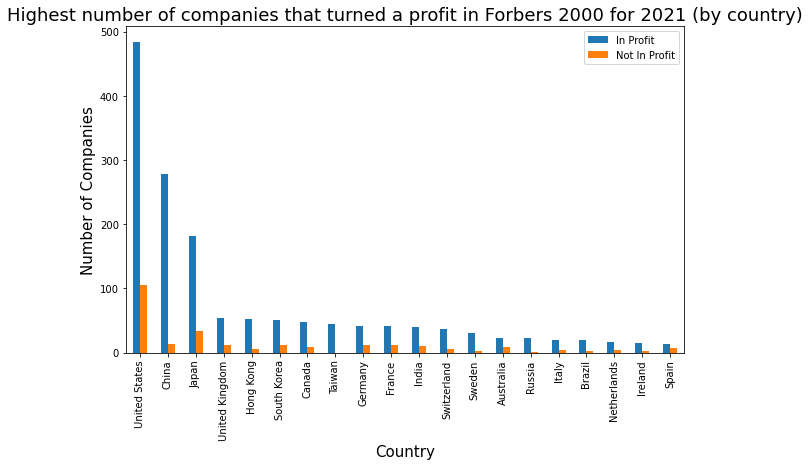

In [87]:
# Create a grouped bar chart
chart = df_countries_in_profit.head(20).plot(kind="bar", xlabel="Country", ylabel="In Profit", title="Highest number of companies in profit by country 2021")

# Retrieve matplotlib figure to format chart size
fig = chart.get_figure()
fig.set_size_inches(10, 6)

plt.xlabel('Country', size=15)
plt.ylabel('Number of Companies', size=15)

plt.title("Highest number of companies that turned a profit in Forbers 2000 for 2021 (by country)", size=18)

plt.show()

# Which countries have the fewest number of companies in the list that turned a profit in 2021? 

In [83]:
# Order by lowest number of companies in profit
df_countries_in_profit.sort_values('In Profit', ascending=True, inplace=True)
df_countries_in_profit.head(10)

,In Profit,Not In Profit
Argentina,0,2
Bangladesh,1,0
Oman,1,0
Bahrain,1,0
Cyprus,1,0
Monaco,1,0
Egypt,1,0
Peru,1,0
Czech Republic,1,0
Venezuela,1,0


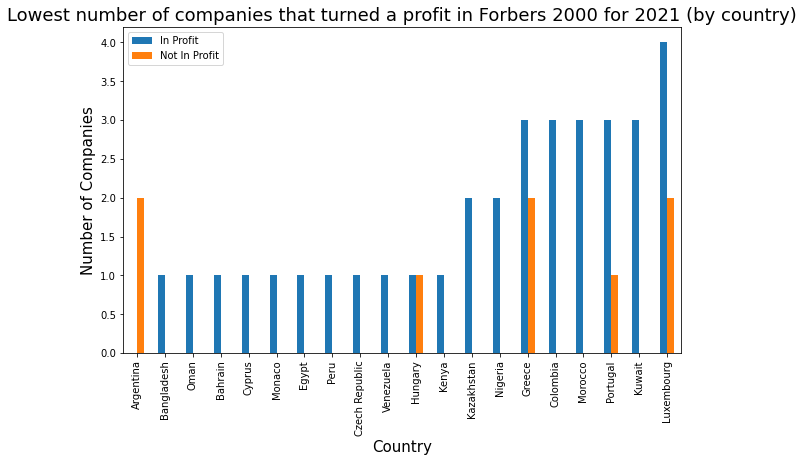

In [85]:
# Create a grouped bar chart
chart = df_countries_in_profit.head(20).plot(kind="bar", xlabel="Country", ylabel="In Profit", title="Highest number of companies in profit by country 2021")

# Retrieve matplotlib figure to format chart size
fig = chart.get_figure()
fig.set_size_inches(10, 6)

plt.xlabel('Country', size=15)
plt.ylabel('Number of Companies', size=15)

plt.title("Lowest number of companies that turned a profit in Forbers 2000 for 2021 (by country)", size=18)

plt.show()

# Which countries have the best profit to sales ratio?

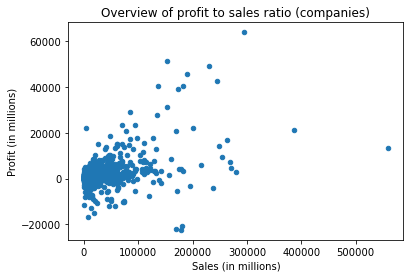

In [17]:
df.plot.scatter(x="Sales (in millions)", y="Profit (in millions)", title="Overview of profit to sales ratio (companies)")
plt.show()

In [18]:
# Create a new profit to sales ration column
df['Profit to Sales ratio'] = (df['Profit (in millions)'] / df['Sales (in millions)']) * 100

In [19]:
# Sort by profit to sales ratio
df_profit_to_sales_ratio = df.sort_values('Profit to Sales ratio', ascending=False).head(10)
df_profit_to_sales_ratio = df_profit_to_sales_ratio[['Name','Sales (in millions)','Profit (in millions)','Profit to Sales ratio']]
# Save for final report
df_profit_to_sales_ratio.to_csv('best_profit_to_sales_ratio', index=False)
df_profit_to_sales_ratio

,Name,Sales (in millions),Profit (in millions),Profit to Sales ratio
1639,RMB Holdings,2.0,2000.0,100000.000000
605,Porsche Automobil Holding,122.0,3000.0,2459.016393
1384,Sofina,97.0,1600.0,1649.484536
1203,Liberty Broadband,51.0,397.6,779.607843
1074,Kinnevik,575.0,4400.0,765.217391
1348,3i Group,157.0,903.4,575.414013
657,CNPC Capital,4400.0,21900.0,497.727273
1569,Power Assets Holdings,164.0,790.6,482.073171
1584,Sparebanken Nord-Norge,481.0,2000.0,415.800416
1037,Segro,554.0,1800.0,324.909747


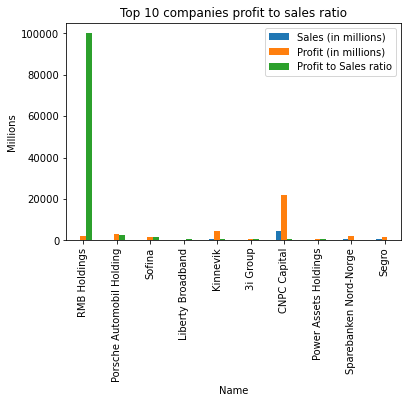

In [20]:
df_profit_to_sales_ratio.plot(kind="bar", x="Name", xlabel="Name", ylabel="Millions", title="Top 10 companies profit to sales ratio")

plt.show()

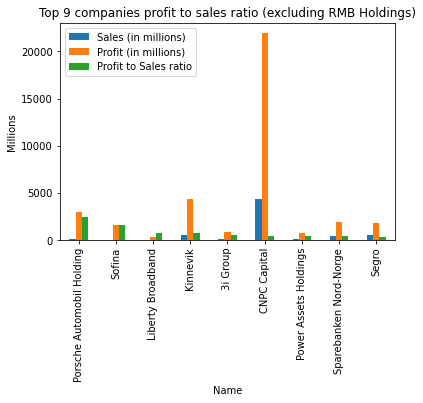

In [21]:
# Withour RMB Holdings
df_profit_to_sales_ratio.tail(9).plot(kind="bar", x="Name", xlabel="Name", ylabel="Millions", title="Top 9 companies profit to sales ratio (excluding RMB Holdings)")

plt.show()

# What are the top 20 companies in terms of assets?

In [22]:
df_top_assets = df.sort_values('Assets (in millions)', ascending=False).head(20)

In [23]:
df_top_assets

,Rank,Name,Country,Sales,Profit,Assets,Market Value,Sales (in millions),Profit (in millions),Assets (in millions),Market Value (in millions),In profit,Profit to Sales ratio
0,1,ICBC,China,$190.5 B,$45.8 B,"$4,914.7 B",$249.5 B,190500.0,45800.0,4914700.0,249500.0,True,24.041995
3,4,China Construction Bank,China,$173.5 B,$39.3 B,"$4,301.7 B",$210.4 B,173500.0,39300.0,4301700.0,210400.0,True,22.651297
8,9,Agricultural Bank of China,China,$153.9 B,$31.3 B,"$4,159.9 B",$140.1 B,153900.0,31300.0,4159900.0,140100.0,True,20.337882
297,298,Fannie Mae,United States,$109.6 B,$11.8 B,"$3,986.1 B",$2.8 B,109600.0,11800.0,3986100.0,2800.0,True,10.766423
13,14,Bank of China,China,$134 B,$27.9 B,"$3,731.4 B",$116.7 B,134000.0,27900.0,3731400.0,116700.0,True,20.820896
1,2,JPMorgan Chase,United States,$136.2 B,$40.4 B,"$3,689.3 B",$464.8 B,136200.0,40400.0,3689300.0,464800.0,True,29.662261
51,52,Mitsubishi UFJ Financial,Japan,$56 B,$5.2 B,"$3,406.5 B",$69.7 B,56000.0,5200.0,3406500.0,69700.0,True,9.285714
29,30,BNP Paribas,France,$102.7 B,$7.6 B,"$3,044.8 B",$79.1 B,102700.0,7600.0,3044800.0,79100.0,True,7.400195
39,40,HSBC Holdings,United Kingdom,$60.6 B,$4 B,"$2,984.2 B",$120.3 B,60600.0,4000.0,2984200.0,120300.0,True,6.600660
86,87,Japan Post Holdings,Japan,$106.6 B,$4.2 B,"$2,879 B",$34.8 B,106600.0,4200.0,2879000.0,34800.0,True,3.939962


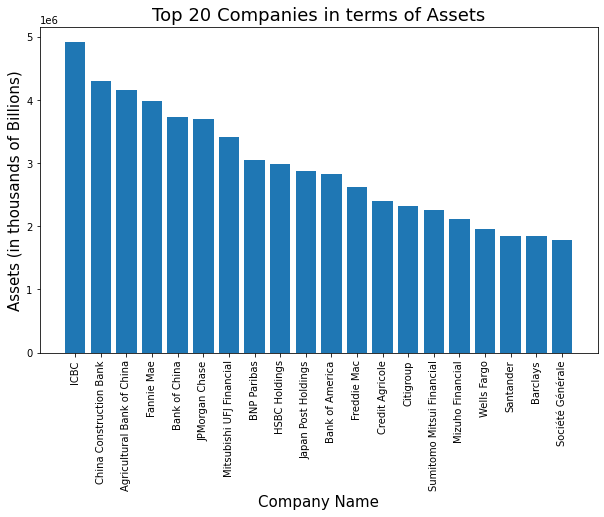

In [24]:
plt.figure(figsize=(10,6))
# make bar plot with matplotlib
plt.bar('Name', 'Assets (in millions)',data=df_top_assets)
plt.xlabel("Company Name", size=15)
plt.ylabel("Assets (in thousands of Billions)", size=15)
plt.title("Top 20 Companies in terms of Assets", size=18)
plt.xticks(rotation=90)
#plt.savefig("bar_plot_matplotlib_Python.png")
plt.show()